In [1]:
import operator
import collections
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from collections import Counter
pd.set_option('display.float_format', lambda x: '%.3f' % x)

__author__ = 'HK Dambanemuya'
__version__ = 'Python 2'

'''
    Analysis originaly performed in Python 2 (deprecated)
    Seaborn, Statsmodel, and * imports broken in Python 3
'''

In [2]:
data = pd.read_csv('./Prosper data/groups.txt', sep="|")
data = data.drop(labels='Unnamed: 19', axis=1)
group_ratings = sorted(data.groupby('GroupRating').groups.keys())
state = sorted(data.groupby('State').groups.keys())
status = sorted(data.groupby('Status').groups.keys())
IsAcceptingNewMembers = sorted(data.groupby('IsAcceptingNewMembers').groups.keys())
features = [column for column in data.columns]
n = len(data)

In [3]:
print ("Dataset dimension: {0}".format(data.shape))
print ("Dataset contains {0} records.".format(n))
print ("Dataset contains {0} features: {1}.".format(len(features), features))

Dataset dimension: (4000, 19)
Dataset contains 4000 records.
Dataset contains 19 features: ['ApprovalDate', 'CategoryKeys', 'City', 'CreationDate', 'Description', 'GroupLeaderRewardPercentageOfBase', 'GroupRating', 'Images', 'IsAcceptingNewMembers', 'Grp_Key', 'Links', 'ListingReviewRequirement', 'MemberKey', 'Name', 'ShortDescription', 'ShortName', 'State', 'Status', 'ModifiedDate'].


## Group Object Description

<table border="0" cellspacing="0" cellpadding="4" style="font-family:Verdana;font-size:11px">
<tbody><tr style="background-color:#E3E1CA">
<th>Name</th>
<th>Label</th>
<th>Type</th>
<th>Description</th>
</tr>
<tr>
<td><b>ApprovalDate</b></td>
<td>Approval Date</td>
<td>datetime</td>
<td>The date the group was approved.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>CategoryKeys</b></td>
<td>Category Keys</td>
<td>string</td>
<td>The comma separated string of Category Keys to which this Group is associated.</td>
</tr>
<tr>
<td><b>City</b></td>
<td>City</td>
<td>string</td>
<td>The city of the location of the group.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>CreationDate</b></td>
<td>Creation Date</td>
<td>datetime</td>
<td>The date the group was created.</td>
</tr>
<tr>
<td><b>Description</b></td>
<td>Description</td>
<td>string</td>
<td>The description that the group leader provides about this group.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>GroupLeaderRewardPercentageOfBase</b></td>
<td>Group Leader Reward Percentage Of Base</td>
<td>decimal</td>
<td>The percentage of the base reward which is kept by the Group Leader.</td>
</tr>
<tr>
<td><b>GroupRating</b></td>
<td>Group Rating</td>
<td>string</td>
<td>
The Group Rating of a Group following values:<br>
<b>Not yet Rated</b><br>
<b>1 Star</b><br>
<b>2 Stars</b><br>
<b>3 Stars</b><br>
<b>4 Stars</b><br>
<b>5 Stars</b><br>
</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>Images</b></td>
<td>Images</td>
<td>xml</td>
<td>These are the captions and URLs to the images that Group Leader has uploaded to describe the Group. These are stored as Name/Value Pairs in XML.</td>
</tr>
<tr>
<td><b>IsAcceptingNewMembers</b></td>
<td>Is Accepting New Members</td>
<td>boolean</td>
<td>Specifies whether or not the group is accepting new members to join the group.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>Key</b></td>
<td>Key</td>
<td>string</td>
<td>The primary key identifier for the Group Object. All Groups have a unique Key.</td>
</tr>
<tr>
<td><b>Links</b></td>
<td>Links</td>
<td>xml</td>
<td>These are the Names and URLs that the Group Leader has linked with this group. These are stored as Name/Value Pairs in XML</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>ListingReviewRequirement</b></td>
<td>Listing Review Requirement</td>
<td>string</td>
<td>
The Listing Review Requirement of the Group is one of the following values:<br>
<b>Required</b> - A listing is subject to review by the Group Leader before going live.<br>
<b>Not Required</b> - A listing is not subject to review by the Group Leader before going live.<br>
</td>
</tr>
<tr>
<td><b>MemberKey</b></td>
<td>Member Key</td>
<td>string</td>
<td>The Key of the member who is the Group Leader of this Group. See the Member Object for more information.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>Name</b></td>
<td>Name</td>
<td>string</td>
<td>The name of the group.</td>
</tr>
<tr>
<td><b>ShortDescription</b></td>
<td>Short Description</td>
<td>string</td>
<td>The short description that the group leader provides about this group.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>ShortName</b></td>
<td>Short Name</td>
<td>string</td>
<td>The short name of the group.</td>
</tr>
<tr>
<td><b>State</b></td>
<td>State</td>
<td>string</td>
<td>The two letter abbreviation of the state (in the United States, or military state) of the address of the location of the group.</td>
</tr>
<tr style="background-color:#F4F4E8">
<td><b>Status</b></td>
<td>Status</td>
<td>string</td>
<td>
The status of the Group is one of the following values:<br>
<b>Pending Approval</b><br>
<b>Approved</b><br>
<b>Denied</b><br>
<b>On Hold</b><br>
</td>
</tr>
</tbody></table>

## Sample Data

In [4]:
data.head()

,ApprovalDate,CategoryKeys,City,CreationDate,Description,GroupLeaderRewardPercentageOfBase,GroupRating,Images,IsAcceptingNewMembers,Grp_Key,Links,ListingReviewRequirement,MemberKey,Name,ShortDescription,ShortName,State,Status,ModifiedDate
0,2005-11-03 19:05:00,"9052336530748910530B17B,29C93365519235002BD2740",San Francisco,2005-10-31 01:35:50,"<p /><b>** Sorry,&nbsp;we are not accepting ne...",0.000,1 Star,<NameValuePairs><NameValuePair><Name>This ugly...,False,5BE63365249159793785758,NaN,Not required,2D523366175445957E9BAD4,Bay Area Entrepreneurs,"If you’re an entrepreneur, small-business owne...",BAE,CA,Approved,2011-06-30 10:41:08
1,2005-11-03 19:05:00,"C8443365198570593F88DD7,133B3366196527956B0A53...",San Francisco,2005-10-31 01:39:17,"<font size=""1"" color=""#c0c0c0""><p align=""cente...",0.000,5 Stars,<NameValuePairs><NameValuePair><Name></Name><V...,True,ACFB3365095848727895936,<NameValuePairs><NameValuePair><Name>Universit...,Required,F4273365023760472DBD934,"University of San Francisco Students, Alumni a...","We are a network of USF students, alumni and a...",USF,CA,Approved,2007-06-05 21:22:36
2,2005-11-03 19:00:00,"AF393365386380750F196A5,9470336542329406299450F",Gainesville,2005-10-31 02:09:16,<p><b>About us:</b></p>\n<p>We are a group of ...,0.000,5 Stars,<NameValuePairs><NameValuePair><Name></Name><V...,True,94E9336577086235891524E,<NameValuePairs><NameValuePair><Name>www.ufrug...,Not required,033E336453973913915CD6B,UF Rugby Old Boys,We are a group of former members of the Univer...,UFOldBoys,FL,Approved,2007-10-23 12:42:38
3,2005-11-03 19:05:00,"6B98336593156141374A8F1,22F4336497228233755E4E...",San Francisco,2005-10-31 11:25:11,We are a group of supporters of automobiles th...,0.000,5 Stars,<NameValuePairs><NameValuePair><Name>Unicorns ...,True,BA973366260114148BF757A,<NameValuePairs><NameValuePair><Name>Grease Ca...,Required,391A3365774785698F09416,Alternative Fuel Auto Financing,We are a group of supporters of automobiles th...,SFGREENCAR,CA,Approved,2007-10-29 23:18:09
4,2005-11-03 19:05:00,"B630336504530734244E329,F6693364444991157B707D...",San Francisco,2005-10-31 15:40:11,"<p align=""center"" /><strong><font size=""5"">Giv...",0.000,5 Stars,<NameValuePairs><NameValuePair><Name></Name><V...,True,B0F633649029077396DC8ED,"<NameValuePairs><NameValuePair><Name>WWOZ, the...",Required,486D3366436821325599D71,Bontemps Roulez!,Bontemps Roulez! is a special group dedicated ...,Bontemps,CA,Approved,2007-06-21 09:53:55


## Summary Statistics

In [5]:
data.describe()

,GroupLeaderRewardPercentageOfBase
count,4000.000
mean,0.369
std,0.366
min,0.000
25%,0.000
50%,0.250
75%,0.500
max,1.000


GroupRating
1 Star            310
2 Stars            22
3 Stars            11
4 Stars            12
5 Stars           288
Not yet rated    3341
Other              16
dtype: int64


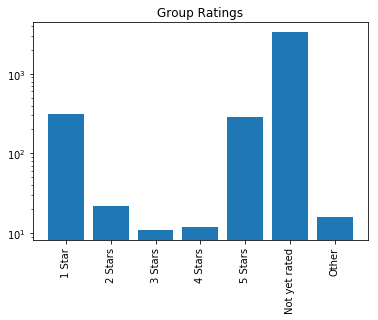

In [6]:
print data.groupby('GroupRating').size()
plt.bar(group_ratings, 
        data.groupby('GroupRating').size())
plt.yscale('log')
plt.xticks(group_ratings, rotation='vertical')
plt.title('Group Ratings')
plt.show()

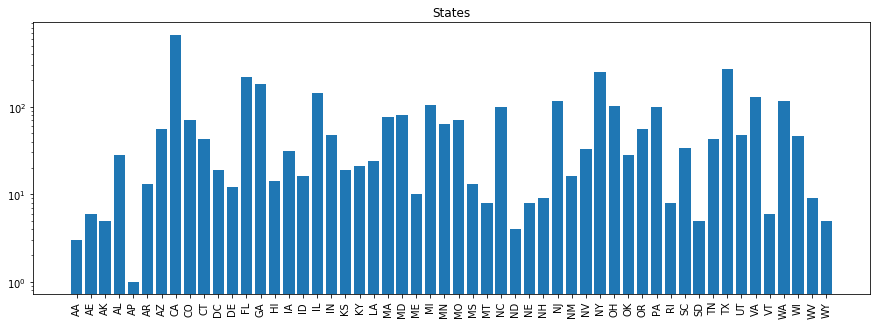

In [7]:
# print data.groupby('State').size()
plt.figure(figsize=(15,5))
plt.bar(state, 
        data.groupby('State').size())
plt.yscale('log')
plt.xticks(state, rotation='vertical')
plt.title('States')
plt.show()

Status
Approved    4000
dtype: int64


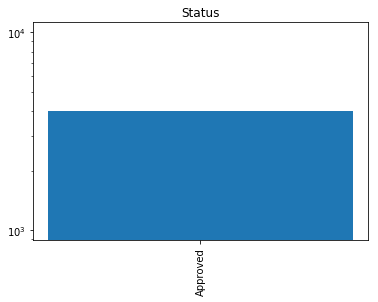

In [8]:
print data.groupby('Status').size()
plt.bar(status, 
        data.groupby('Status').size())
plt.yscale('log')
plt.xticks(status, rotation='vertical')
plt.title('Status')
plt.show()

IsAcceptingNewMembers
False     403
True     3597
dtype: int64


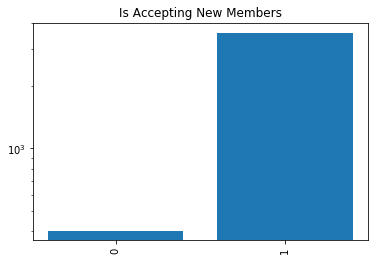

In [9]:
print data.groupby('IsAcceptingNewMembers').size()
plt.bar(IsAcceptingNewMembers, 
        data.groupby('IsAcceptingNewMembers').size())
plt.yscale('log')
plt.xticks(IsAcceptingNewMembers, rotation='vertical')
plt.title('Is Accepting New Members')
plt.show()